# BSO Demo: Graph Coloring with Bee Swarm Optimization (New Implementation)

This notebook demonstrates running the updated BSOColoring implementation on a DIMACS‐style benchmark graph and visualizing the results.


In [5]:
import sys, os
sys.path.insert(0, os.path.abspath('../src'))  # adjust if needed

from bso_coloring import BSOColoring
import networkx as nx
import matplotlib.pyplot as plt
import random

%matplotlib inline


In [6]:
def load_graph(path):
    G = nx.Graph()
    with open(path) as f:
        for line in f:
            parts = line.split()
            if not parts:
                continue
            if parts[0] == 'p':
                n = int(parts[1])
                G.add_nodes_from(range(1, n+1))
            elif parts[0] == 'e':
                u, v = map(int, parts[1:])
                G.add_edge(u, v)
    return G


In [7]:
# Choose your graph path
graph_path = '../data/benchmarks/test1.txt'
G = load_graph(graph_path)
print(f"Loaded graph with {G.number_of_nodes()} nodes and {G.number_of_edges()} edges.")


Loaded graph with 138 nodes and 493 edges.


In [13]:
# Instantiate and run the BSOColoring solver
solver = BSOColoring(
    G,
    k_max=20,
    n_bees=20,
    n_chance=2,
    max_iter=100,
    max_steps=10,
    flip=5,
    seed=42
)
best_coloring, fitness = solver.run()
conflicts = fitness // solver.alpha
colors_used = fitness % solver.alpha
print(f"Best coloring: {best_coloring}")
print(f"Best fitness: {fitness}  (Conflicts: {conflicts}, Colors used: {colors_used})")


Best coloring: [15, 18, 10, 6, 15, 1, 13, 14, 3, 13, 1, 3, 2, 1, 13, 13, 11, 20, 17, 15, 10, 20, 11, 18, 2, 10, 1, 9, 1, 10, 4, 9, 10, 7, 4, 5, 3, 7, 4, 14, 16, 15, 1, 9, 13, 17, 18, 1, 5, 1, 14, 4, 18, 3, 2, 12, 18, 5, 8, 16, 2, 17, 10, 19, 14, 10, 10, 12, 12, 4, 10, 17, 19, 4, 18, 10, 11, 18, 13, 15, 17, 5, 15, 7, 1, 6, 1, 15, 14, 14, 12, 3, 18, 8, 9, 4, 15, 16, 3, 12, 1, 4, 7, 19, 9, 19, 7, 10, 3, 7, 10, 4, 5, 17, 2, 16, 1, 8, 3, 5, 15, 11, 14, 14, 10, 10, 18, 6, 14, 11, 13, 11, 7, 5, 7, 11, 8, 2]
Best fitness: 20  (Conflicts: 0, Colors used: 20)


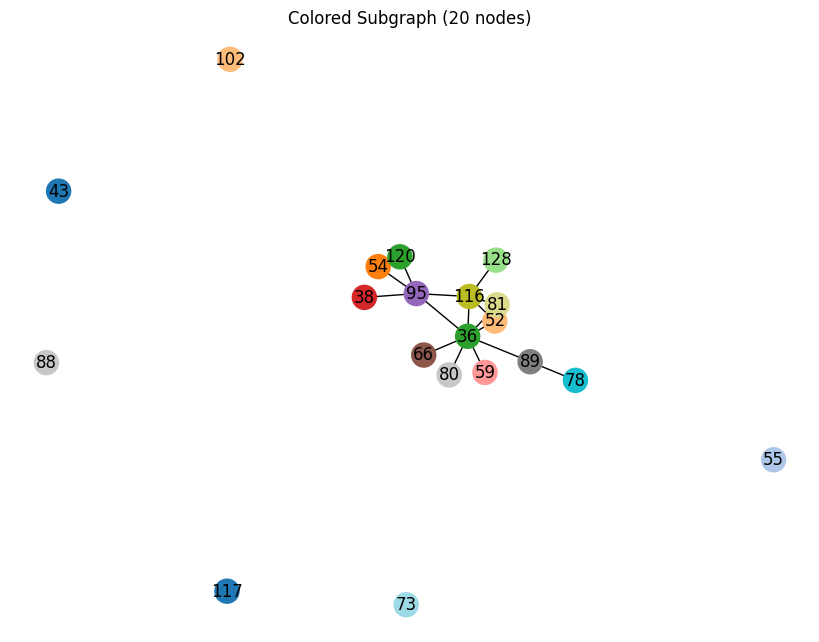

In [9]:
# Visualize a random subgraph of 20 nodes
nodes = random.sample(list(G.nodes()), 20)
subG = G.subgraph(nodes)
pos = nx.spring_layout(subG, seed=42)
colors = [best_coloring[node-1] for node in subG.nodes()]

plt.figure(figsize=(8,6))
nx.draw(subG, pos,
        with_labels=True,
        node_color=colors,
        cmap=plt.cm.tab20,
        node_size=300)
plt.title("Colored Subgraph (20 nodes)")
plt.show()


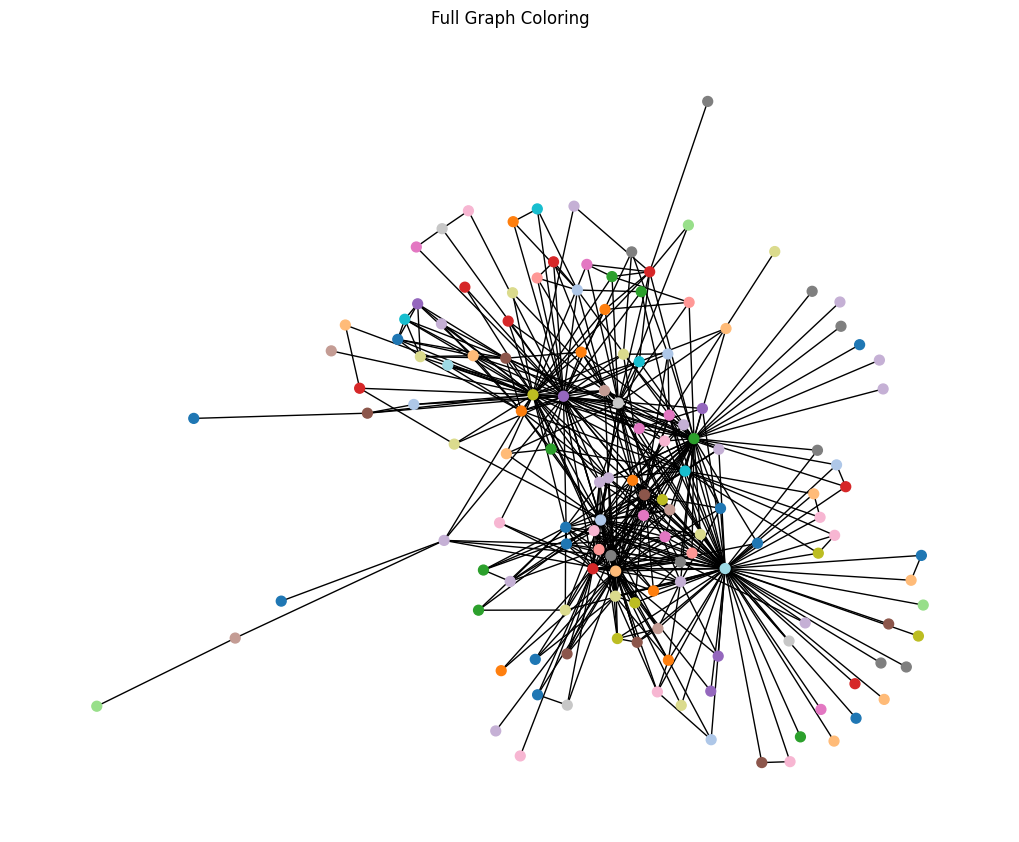

In [12]:
# Visualize full graph coloring
pos_full = nx.spring_layout(G, seed=42)
colors_full = [best_coloring[node-1] for node in G.nodes()]

plt.figure(figsize=(10,8))
nx.draw(G, pos_full,
        with_labels=False,
        node_color=colors_full,
        cmap=plt.cm.tab20,
        node_size=50)
plt.title("Full Graph Coloring")
plt.show()
